#### TODOS
- [x] Scale distplots with log axes
- [ ] Scale scatterplots with log-log, z-score
- [ ] Add new feature that is (pubs with prof) * de-weight / pubs
- [x] Change prof definition to .25
- [x] Add scatterplots for max/min/mean

In [17]:
import pandas as pd

In [25]:
df_all = pd.read_csv('C:\\Users\\Brend\\Downloads\\correlation.csv', index_col = 'name', encoding = "UTF-8")

In [26]:
print("Total: %d authors" % df_all.shape[0])
for i in range(1, 11):
    print("%d authors with less than %d publications" % (df_all[df_all['num_pubs'] < i].shape[0], i))

Total: 293023 authors
0 authors with less than 1 publications
6111 authors with less than 2 publications
10732 authors with less than 3 publications
14891 authors with less than 4 publications
18724 authors with less than 5 publications
22434 authors with less than 6 publications
25987 authors with less than 7 publications
29436 authors with less than 8 publications
32750 authors with less than 9 publications
35958 authors with less than 10 publications


In [27]:
print("Total: %d authors" % df_all.shape[0])
for i in range(1, 11):
    print("%d authors with less than %d coauthorships" % (df_all[df_all['TotalConns'] < i].shape[0], i))

Total: 293023 authors
0 authors with less than 1 coauthorships
21494 authors with less than 2 coauthorships
41888 authors with less than 3 coauthorships
58251 authors with less than 4 coauthorships
71756 authors with less than 5 coauthorships
83432 authors with less than 6 coauthorships
93317 authors with less than 7 coauthorships
102164 authors with less than 8 coauthorships
110017 authors with less than 9 coauthorships
117306 authors with less than 10 coauthorships


In [28]:
df_trimmed = df_all[df_all['num_pubs'] >= 5]
df_trimmed = df_trimmed[df_trimmed['TotalConns'] >= 3]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 193942 authors


In [29]:
df_trimmed = df_trimmed[df_trimmed['max_AR'] < 1000]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 193941 authors


In [30]:
df_trimmed = df_trimmed[df_trimmed['InterCommunityFocus'] < 900]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 193940 authors


In [ ]:
for col in df_trimmed.columns:
    print("\nTop 10 %s" % str(col))
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    print(df_not_null[[col]].sort_values(col, ascending = False).head(10))
    print("\nBottom 10 %s" % str(col))
    print(df_not_null[[col]].sort_values(col, ascending = True).head(10))

In [31]:
df_trimmed.loc[['Eric S. Lander', 'Robert Langer', 'Marvin Minsky']]

,num_pubs,IntraCommunityFocus,InterCommunityFocus,TotalConns,InterClusterRatio,IntraClusterRatio,pct_collab_linauth,pct_collab_linprof,pct_collab_sqrtauth,pct_collab_sqrtprof,...,median_NAR,min_NAR,avg_PR,max_PR,median_PR,min_PR,avg_AR,max_AR,median_AR,min_AR
name,,,,,,,,,,,,,,,,,,,,,
Eric S. Lander,726.0,1.458449,0.786175,5348.0,0.681937,0.318063,0.187796,0.389683,0.341184,0.519778,...,0.475278,0.15,10.361763,179.527591,3.731211,0.15,6.344966,100.363912,2.630555,0.15
Robert Langer,2276.0,1.105141,0.896468,389.0,0.503856,0.496144,0.406968,0.458800,0.472806,0.508145,...,0.150000,0.15,4.873018,21.636555,0.317467,0.15,2.785981,9.077218,0.264555,0.15
Marvin Minsky,168.0,0.000000,1.000000,4.0,1.000000,0.000000,0.078571,0.078869,0.082508,0.082823,...,0.150000,0.15,0.150000,0.150000,0.150000,0.15,0.150000,0.150000,0.150000,0.15


In [33]:
df_percentile = df_trimmed.copy()
for col in df_trimmed.columns:
    percentile_col = df_trimmed[pd.notna(df_trimmed[col])][col]
    df_percentile[col+'_%'] = percentile_col.rank(pct=True)
df_percentile.loc[['Eric S. Lander', 'Robert Langer', 'Marvin Minsky']][[col for col in df_percentile.columns if '%' in col and 'NAR' not in col]]

,num_pubs_%,IntraCommunityFocus_%,InterCommunityFocus_%,TotalConns_%,InterClusterRatio_%,IntraClusterRatio_%,pct_collab_linauth_%,pct_collab_linprof_%,pct_collab_sqrtauth_%,pct_collab_sqrtprof_%,...,median_NPR_%,min_NPR_%,avg_PR_%,max_PR_%,median_PR_%,min_PR_%,avg_AR_%,max_AR_%,median_AR_%,min_AR_%
name,,,,,,,,,,,,,,,,,,,,,
Eric S. Lander,0.966265,0.906600,0.353898,0.999974,0.762086,0.237919,0.605776,0.791370,0.761792,0.883855,...,0.915479,0.304594,0.964236,0.999247,0.875157,0.066582,0.965376,0.999345,0.890072,0.066582
Robert Langer,0.995499,0.753078,0.424554,0.939208,0.608085,0.391920,0.925937,0.886850,0.917798,0.871303,...,0.220282,0.304594,0.897133,0.977034,0.245096,0.066582,0.887517,0.961488,0.285166,0.066582
Marvin Minsky,0.746839,0.117052,0.532198,0.077769,0.982095,0.017910,0.315505,0.129652,0.182572,0.099887,...,0.220282,0.304594,0.018774,0.018774,0.023701,0.066582,0.018774,0.018774,0.023701,0.066582


In [39]:
from sklearn.preprocessing import StandardScaler
df_scaled = df_trimmed.copy()
for col in df_trimmed.columns:
    ss = StandardScaler()
    scaled_col = df_scaled[[col]]
    df_scaled[col + '_Zscore'] = ss.fit_transform(scaled_col)
df_zscores = df_scaled[[col for col in df_scaled.columns if 'Zscore' in col]]

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
%matplotlib inline

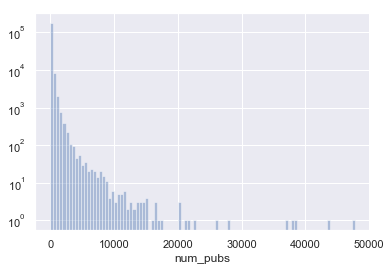

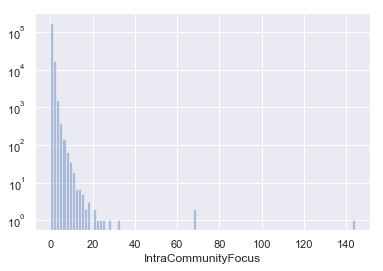

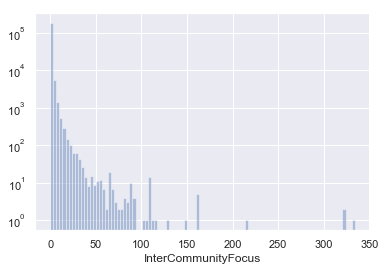

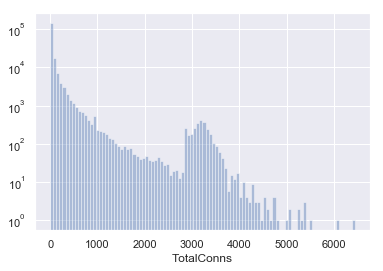

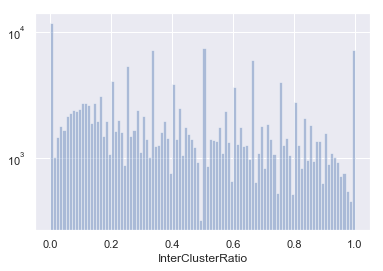

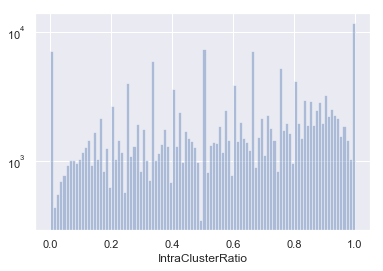

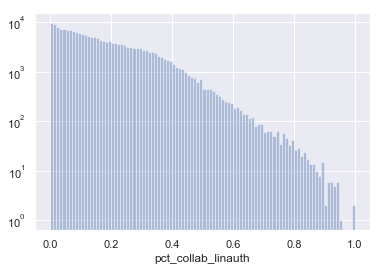

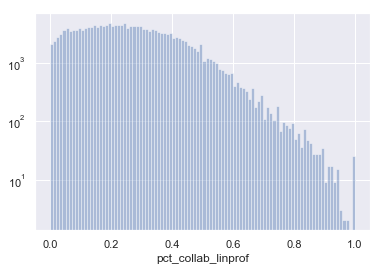

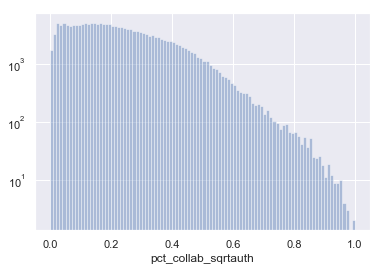

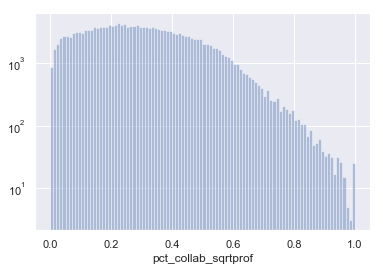

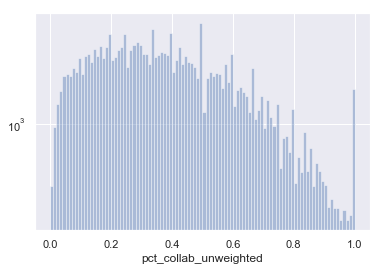

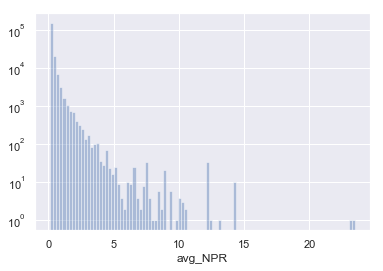

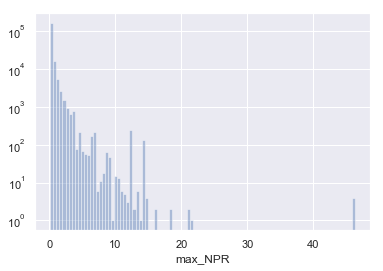

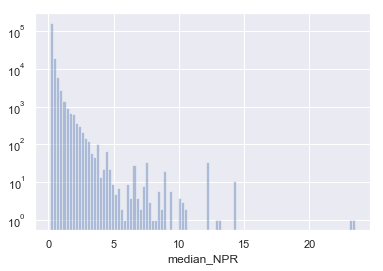

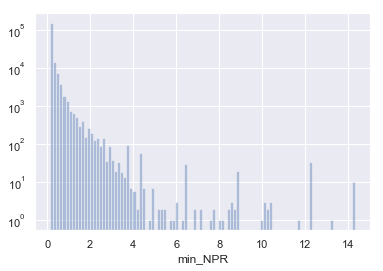

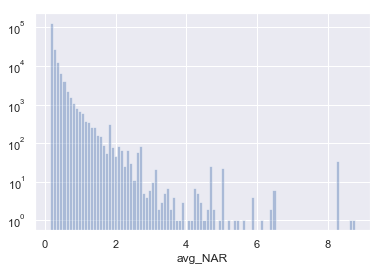

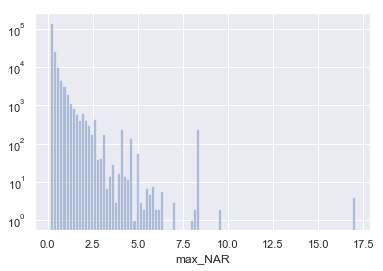

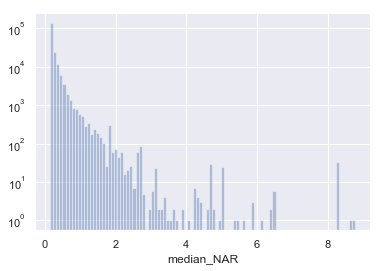

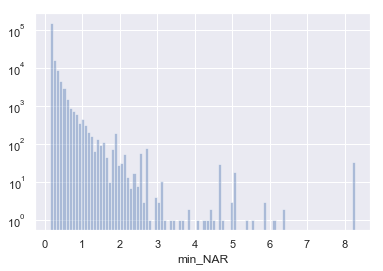

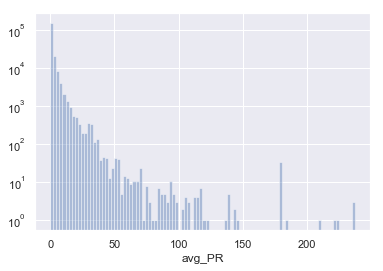

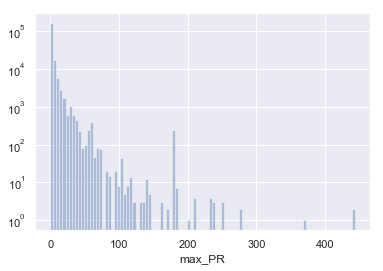

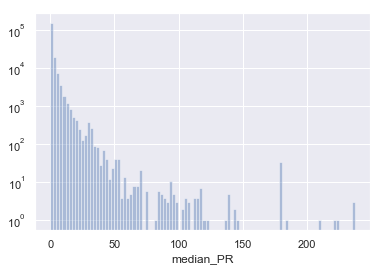

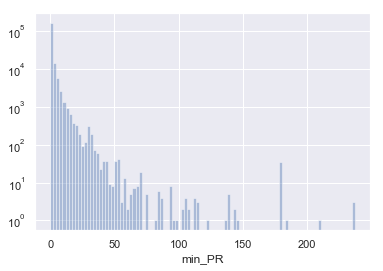

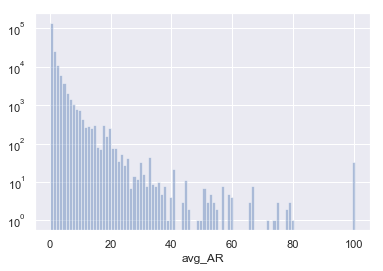

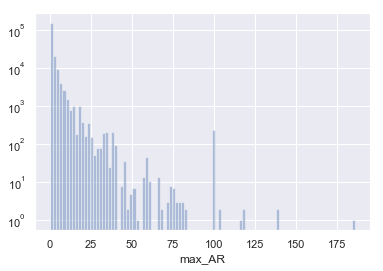

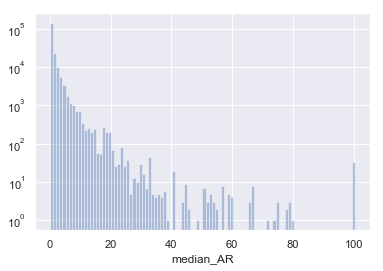

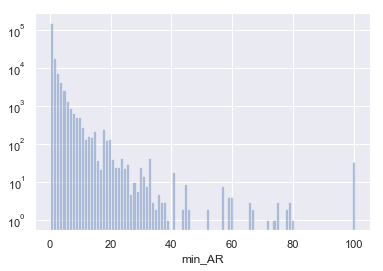

In [41]:
for col in df_trimmed.columns:
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
    ax.set_yscale('log')
    plt.show()

In [42]:
print(df_zscores.columns)

Index(['num_pubs_Zscore', 'IntraCommunityFocus_Zscore',
       'InterCommunityFocus_Zscore', 'TotalConns_Zscore',
       'InterClusterRatio_Zscore', 'IntraClusterRatio_Zscore',
       'pct_collab_linauth_Zscore', 'pct_collab_linprof_Zscore',
       'pct_collab_sqrtauth_Zscore', 'pct_collab_sqrtprof_Zscore',
       'pct_collab_unweighted_Zscore', 'avg_NPR_Zscore', 'max_NPR_Zscore',
       'median_NPR_Zscore', 'min_NPR_Zscore', 'avg_NAR_Zscore',
       'max_NAR_Zscore', 'median_NAR_Zscore', 'min_NAR_Zscore',
       'avg_PR_Zscore', 'max_PR_Zscore', 'median_PR_Zscore', 'min_PR_Zscore',
       'avg_AR_Zscore', 'max_AR_Zscore', 'median_AR_Zscore', 'min_AR_Zscore'],
      dtype='object')


c:\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


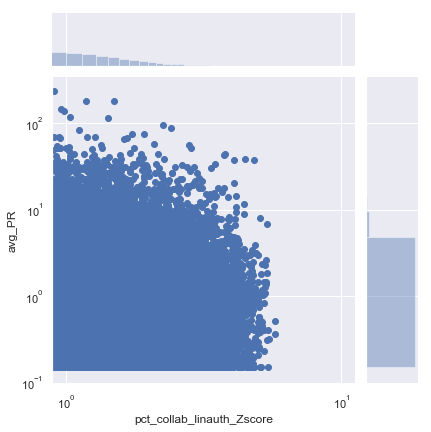

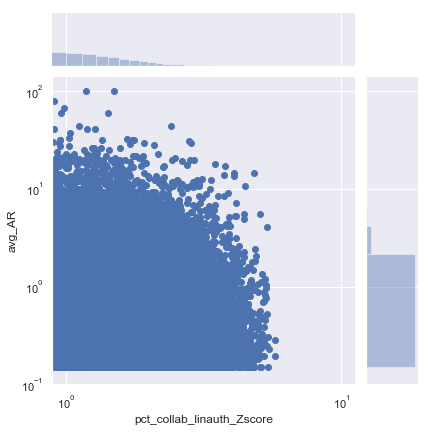

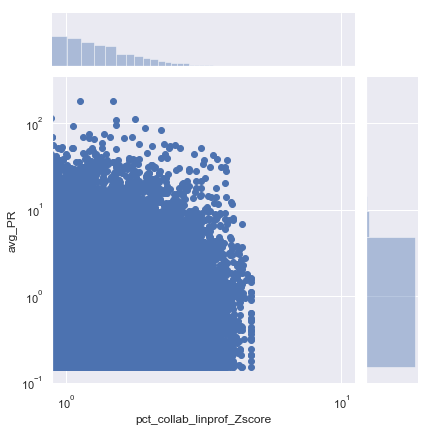

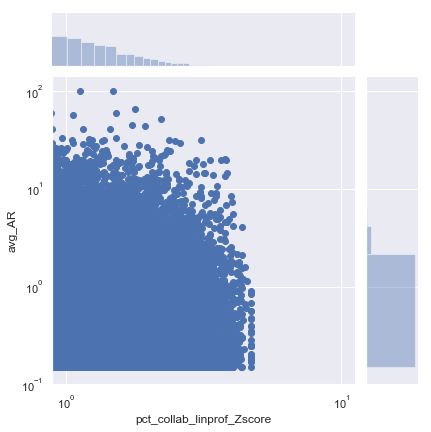

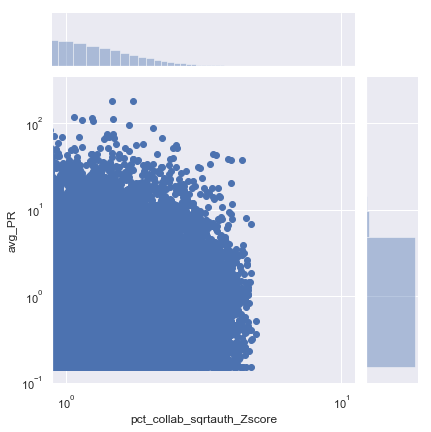

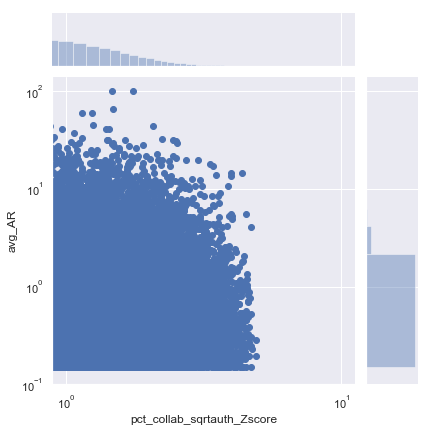

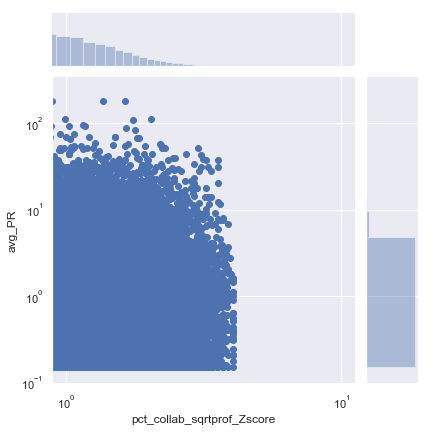

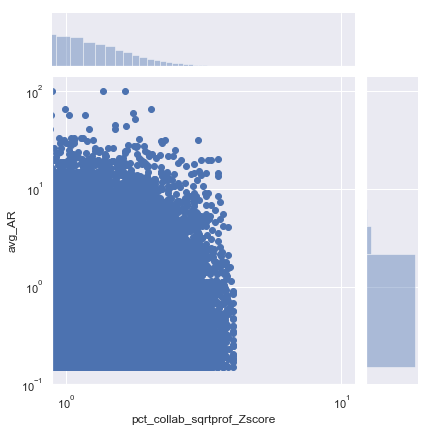

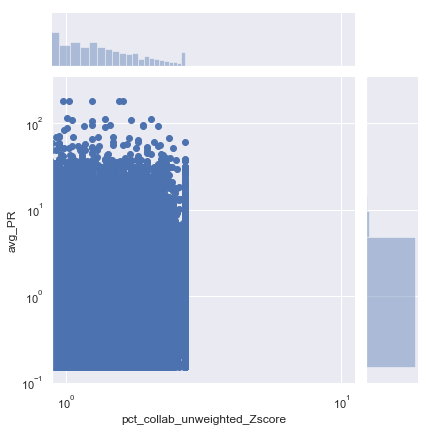

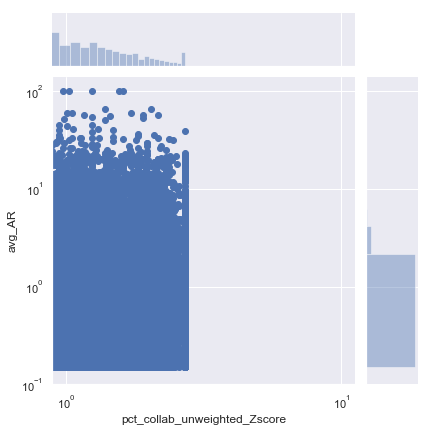

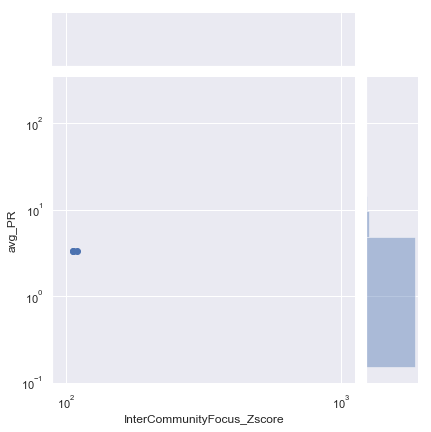

In [ ]:
collab_columns = ['pct_collab_linauth_Zscore', 'pct_collab_linprof_Zscore', 
                  'pct_collab_sqrtauth_Zscore', 'pct_collab_sqrtprof_Zscore', 
                  'pct_collab_unweighted_Zscore','InterCommunityFocus_Zscore',
                  'InterClusterRatio_Zscore']
impact_columns = ['avg_PR', 'avg_AR']

for x_col in collab_columns:
    for y_col in impact_columns:
        g = sns.jointplot(x = x_col, y = y_col, data = pd.concat([df_zscores[[x_col]], df_trimmed[[y_col]]], axis = 1), dropna = True)
        g.ax_marg_x.set_xscale('log')
        g.ax_marg_y.set_yscale('log')
        plt.show()

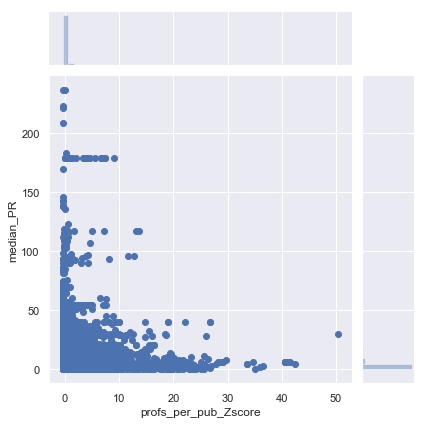

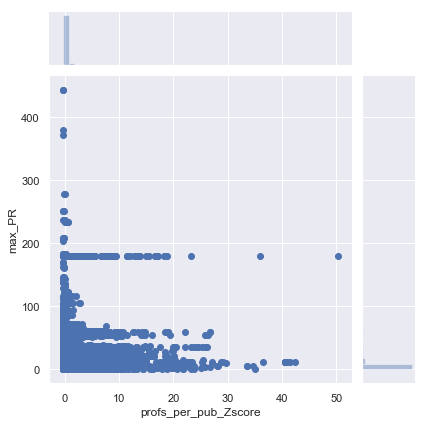

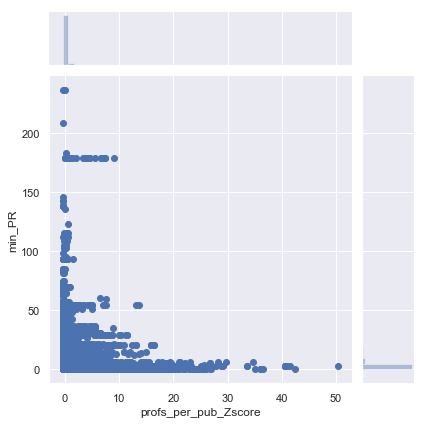

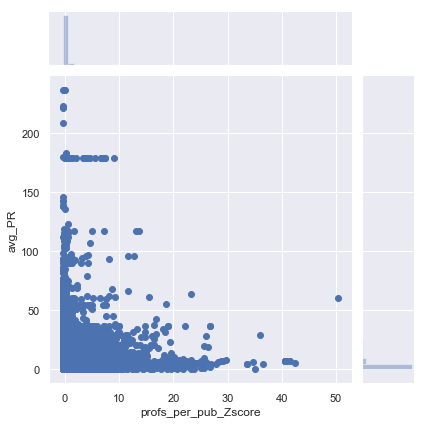

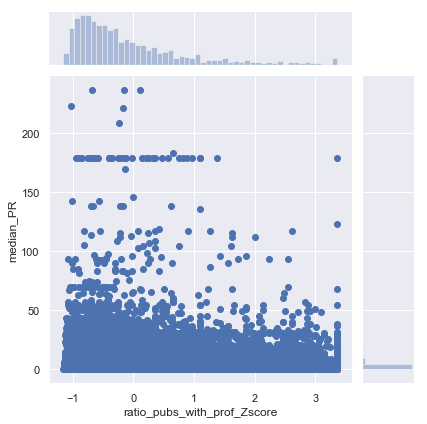

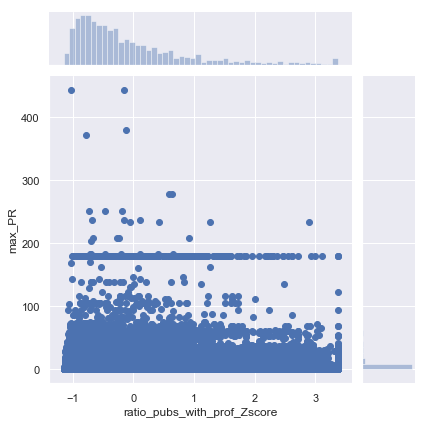

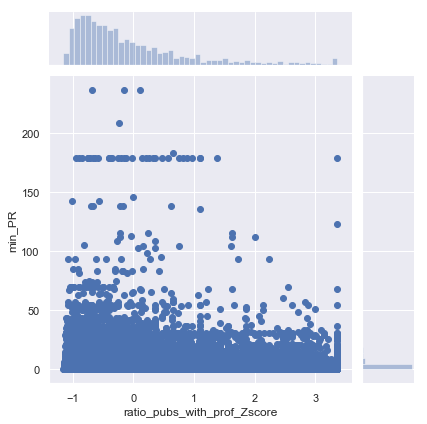

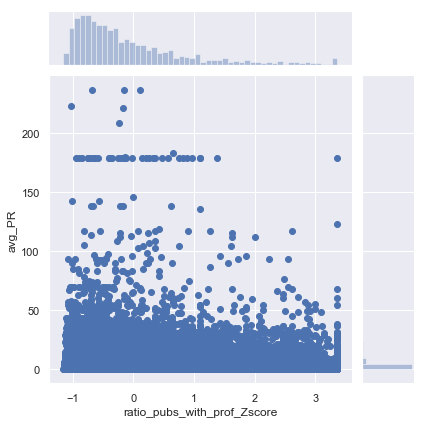

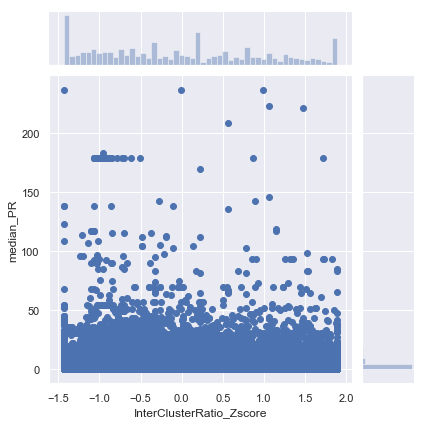

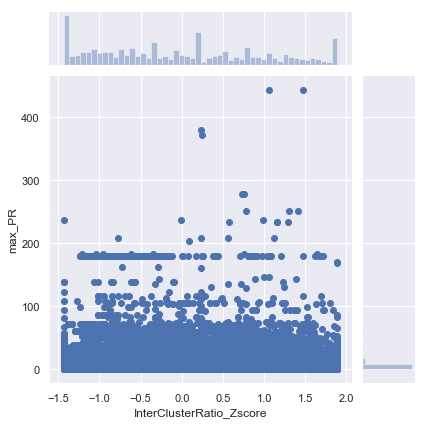

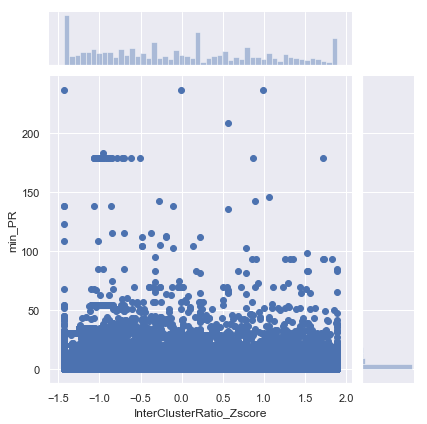

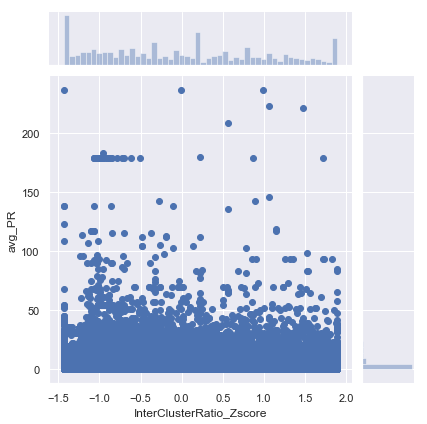

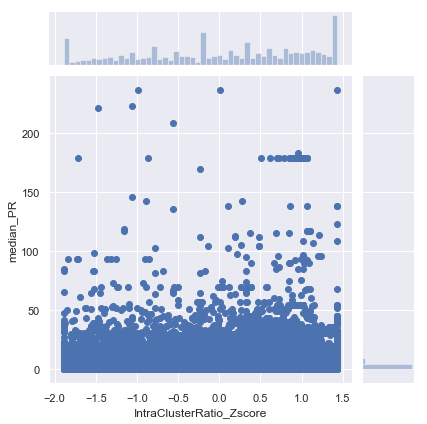

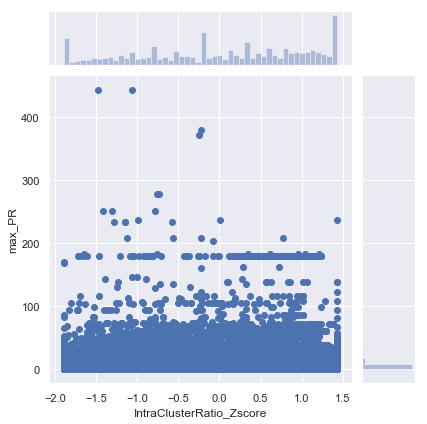

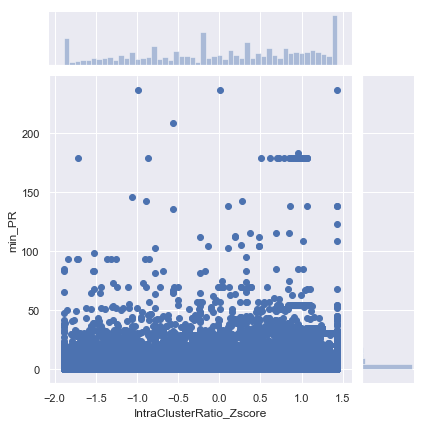

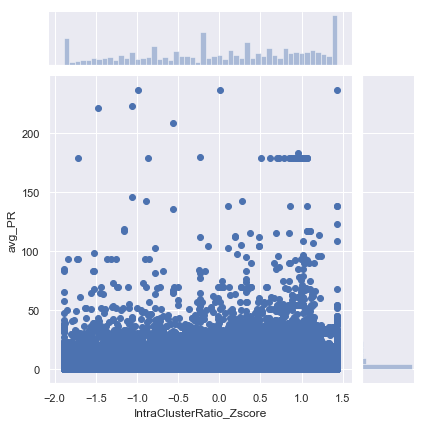

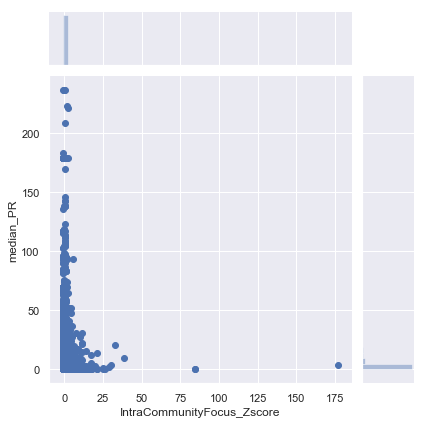

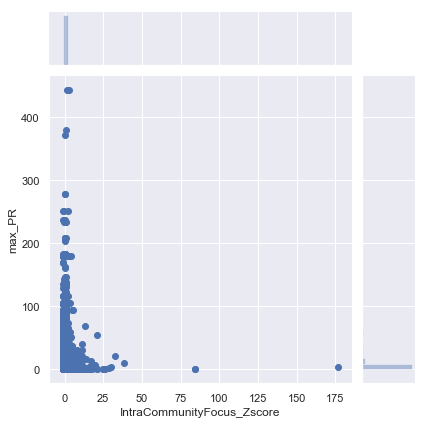

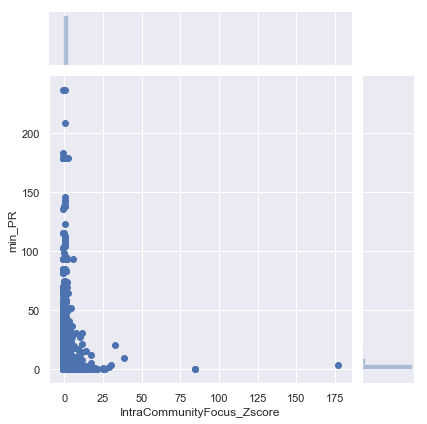

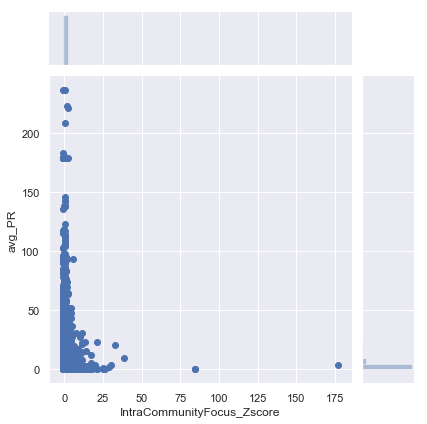

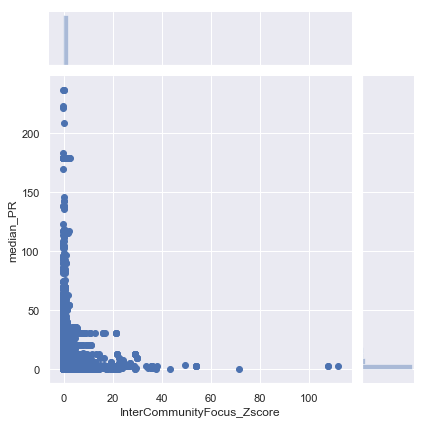

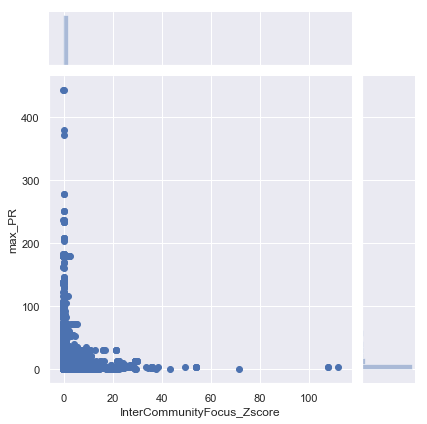

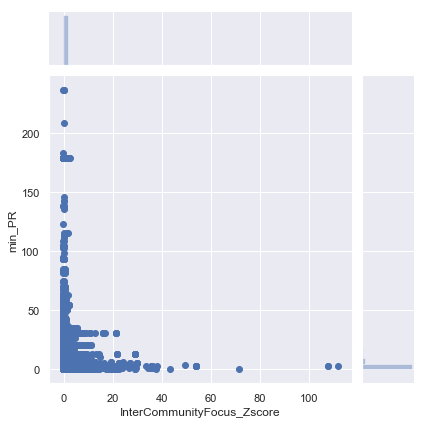

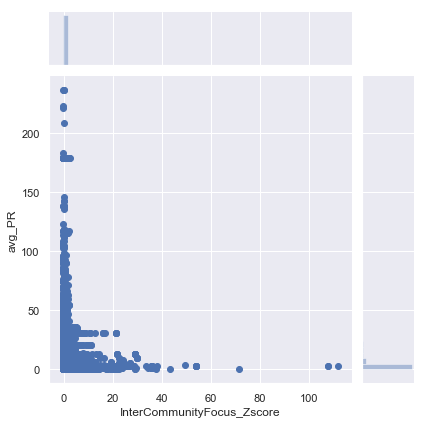

In [18]:
collab_columns = ['pct_collab_linauth_Zscore', 'pct_collab_linprof_Zscore', 
                  'pct_collab_sqrtauth_Zscore', 'pct_collab_sqrtprof_Zscore', 
                  'pct_collab_unweighted_Zscore','InterCommunityFocus_Zscore',
                  'InterClusterRatio_Zscore']
impact_columns = ['avg_PR', 'avg_AR']

for x_col in collab_columns:
    for y_col in impact_columns:
        g = sns.jointplot(x = x_col, y = y_col, data = pd.concat([df_zscores[[x_col]], df_trimmed[[y_col]]], axis = 1), dropna = True)
#         g.ax_marg_x.set_xscale('log')
#         g.ax_marg_y.set_yscale('log')
        plt.show()